In [1]:
!pip install h2o

In [2]:
!pip install tpot

In [3]:
!pip install flaml

In [4]:
import sklearn
print(sklearn.__version__)

1.2.2


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('/content/drive/MyDrive/telecom_users.csv')
df.drop("Unnamed: 0", axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
df['Partner'] = df['Partner'].map({'Yes':1, 'No':0})
df['Dependents'] = df['Dependents'].map({'Yes':1, 'No':0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes':1, 'No':0})
df['PhoneService'] = df['PhoneService'].map({'Yes':1, 'No':0})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,1,1,72,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),24.10,1734.65,0
1,9688-YGXVR,Female,0,0,0,44,1,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,1,Credit card (automatic),88.15,3973.20,0
2,9286-DOJGF,Female,1,1,0,38,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,6994-KERXL,Male,0,0,0,4,1,No,DSL,No,...,No,No,No,Yes,Month-to-month,1,Electronic check,55.90,238.50,0
4,2181-UAESM,Male,0,0,0,2,1,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,0,Electronic check,53.45,119.50,0


In [7]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [9]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5976 non-null   object 
 1   gender            5976 non-null   object 
 2   SeniorCitizen     5976 non-null   int64  
 3   Partner           5976 non-null   int64  
 4   Dependents        5976 non-null   int64  
 5   tenure            5976 non-null   int64  
 6   PhoneService      5976 non-null   int64  
 7   MultipleLines     5976 non-null   object 
 8   InternetService   5976 non-null   object 
 9   OnlineSecurity    5976 non-null   object 
 10  OnlineBackup      5976 non-null   object 
 11  DeviceProtection  5976 non-null   object 
 12  TechSupport       5976 non-null   object 
 13  StreamingTV       5976 non-null   object 
 14  StreamingMovies   5976 non-null   object 
 15  Contract          5976 non-null   object 
 16  PaperlessBilling  5976 non-null   int64  


<ipython-input-10-44e2c72dde52>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


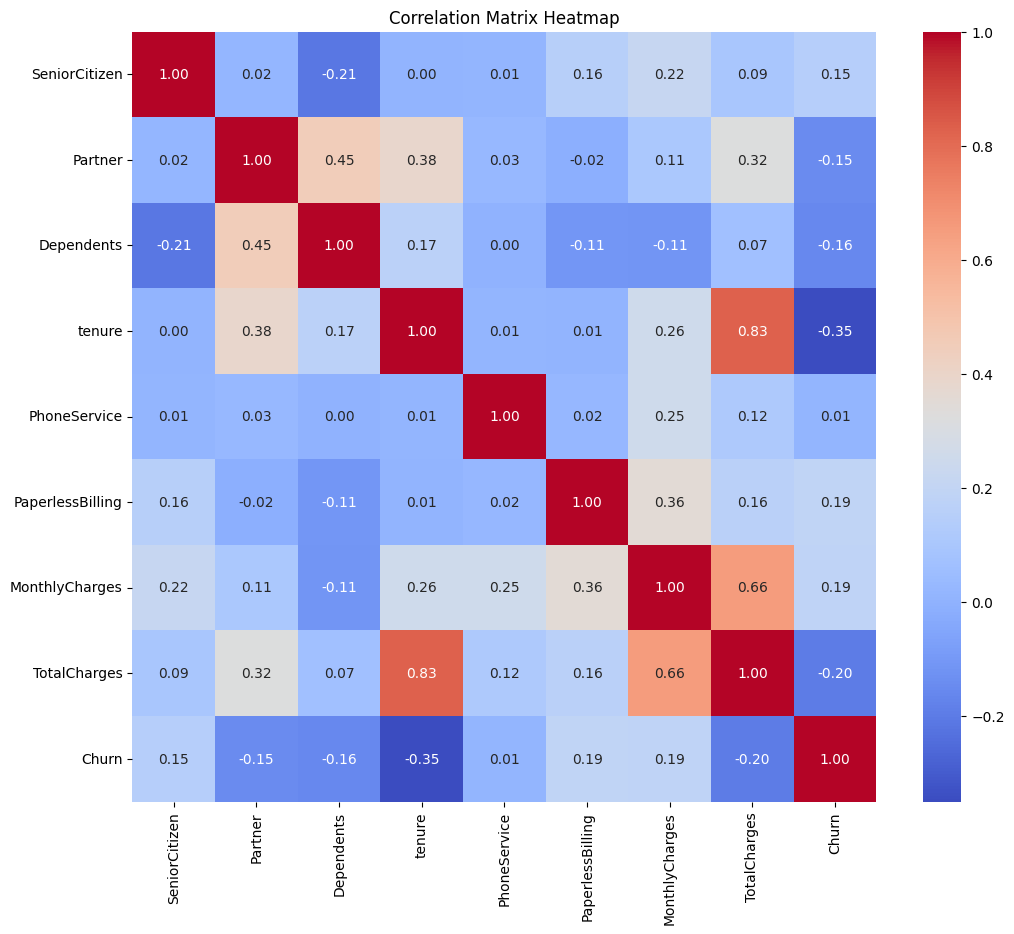

In [10]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [11]:
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print(highly_correlated_features)

{'TotalCharges'}


In [12]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = df.select_dtypes(include=['number'])
X = X.drop(['Churn'], axis=1)
y = df['Churn']

model = RandomForestClassifier()

rfe = RFE(model, n_features_to_select=1)
X_rfe = rfe.fit_transform(X, y)

selected_features = X.columns[rfe.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['TotalCharges'], dtype='object')


In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.select_dtypes(include=['number'])
X = X.drop(['Churn'], axis=1)
y = df['Churn']


k = 8
selector = SelectKBest(f_classif, k=k)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')
